In [1]:
import os
os.chdir(r"C:\Users\ahmad\OneDrive\Bureau\Score")

from librairies_nexialog import *
from function_nexialog import *

In [2]:
data = pd.read_csv(r"credit_risk_dataset.csv")

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data["loan_status"] = np.where((data["loan_status"]==0) & (data["cb_person_default_on_file"]=="Y"),1,data["loan_status"]) # inclusion de ceux tombés au moins une fois dans le défaut

In [5]:
data["loan_status"].value_counts(normalize=True)

0    0.672171
1    0.327829
Name: loan_status, dtype: float64

In [5]:
data.drop(columns = ["cb_person_default_on_file"],inplace=True)

In [6]:
data.isnull().sum()

# "person_emp_length" : le client n'a pas d'expérience donc c'est de l'info
# "loan_int_rate" : on va la discrétiser dans tous les cas (pas de taux d'intérêt étudier ces cas pour voir ce que c'est)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
data[["loan_grade","loan_status"]].groupby(by=["loan_grade"]).mean()
# Score comportementale ici en raison d'une variable de comportement en l'occurence "loan_grade" et de variable non dispo à l'octroi comme "loan_int_rate"

,loan_status
loan_grade,
A,0.099564
B,0.162760
C,0.612264
D,0.797022
E,0.824689
F,0.846473
G,1.000000


In [29]:
data[["loan_intent","loan_amnt"]].groupby(by=["loan_intent"]).mean() # c'est tous des prêts assez simialires prêts à la conso ici

,loan_amnt
loan_intent,
DEBTCONSOLIDATION,9594.886800
EDUCATION,9482.678599
HOMEIMPROVEMENT,10360.520111
MEDICAL,9259.582441
PERSONAL,9573.772867
VENTURE,9583.777758


In [6]:
# Ici pas de sélection majeure de variable étant donné que l'on a 11 variables, pas de données manquantes et valeurs extrêmes car discrétisation 

In [90]:
#var_disc = data.select_dtypes(include=[np.object]).columns

In [8]:
# Down Turn :

data["Downturn"] = data["loan_int_rate"]/13.7

# Avec 13.7 la moyenne des niveau de taux à la conso aux USA en épriode de crise, donc si rapport > 1 => période de crise et < 1 sinon
# Plusieurs pb ici d'une l'absence de date, pas que des prêts immo donc assujetti à des niveaux plus grands donc

In [9]:
data["Downturn"].describe()

count    29465.000000
mean         0.803773
std          0.236530
min          0.395620
25%          0.576642
50%          0.802190
75%          0.983212
max          1.694891
Name: Downturn, dtype: float64

In [10]:
df = label_encoding(data,"loan_status")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,Downturn
0,22,59000,2,123.0,2,3,35000,16.02,1,0.59,3,1.169343
1,21,9600,0,5.0,1,1,1000,11.14,0,0.10,2,0.813139
2,25,9600,1,1.0,3,2,5500,12.87,1,0.57,3,0.939416
3,23,65500,2,4.0,3,2,35000,15.23,1,0.53,2,1.111679
4,24,54400,2,8.0,3,2,35000,14.27,1,0.55,4,1.041606
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1,1.0,2,2,5800,13.16,0,0.11,30,0.960584
32577,54,120000,1,4.0,2,0,17625,7.49,0,0.15,19,0.546715
32578,65,76000,2,3.0,5,1,35000,10.99,1,0.46,28,0.802190
32579,56,150000,1,5.0,2,1,15000,11.48,0,0.10,26,0.837956


In [11]:
df["id_contrat"] = range(df.shape[0])
# Pour la fonction de stabilité on a besoin d'une variable à valeur unique pour chaque contrat typiquement un id_contrat

In [12]:
# Downturn :

df["Downturn"] = np.where(df["Downturn"] >= 1,1,0)

In [10]:
df[["Downturn","loan_status"]].groupby(by=["Downturn"]).mean()

,loan_status
Downturn,
0,0.153535
1,0.482651


In [13]:
cond  = [df["loan_grade"]<=1 ,( df["loan_grade"]== 2) | (df["loan_grade"] <= 3)]
choix = [0,1]
df["loan_grade"]  = np.select(cond,choix,2)

In [12]:
df[["loan_grade","loan_status"]].groupby(by=["loan_grade"]).mean()

,loan_status
loan_grade,
0,0.130676
1,0.345101
2,0.672971


Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

,nombre,defaut,taux defaut,minimum,maximum
0,2584,193,7.47,0.0,0.0
1,16028,1883,11.75,0.0,1.0
2,13444,1690,12.57,1.0,1.0
3,13444,1690,12.57,1.0,1.0
4,13444,1690,12.57,1.0,1.0
5,13444,1690,12.57,1.0,1.0
6,13444,1690,12.57,1.0,1.0
7,13444,1690,12.57,1.0,1.0
8,13444,1690,12.57,1.0,1.0
9,29997,6915,23.05,1.0,3.0


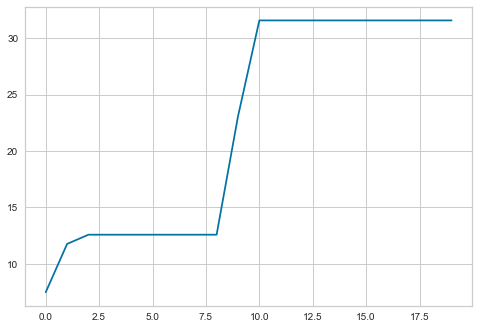

In [13]:
# person_home_ownership

find_bin(df,"person_home_ownership","loan_status")

In [19]:
data[["person_home_ownership","loan_status"]].groupby(by=["person_home_ownership"]).mean()

,loan_status
person_home_ownership,
MORTGAGE,0.231479
OTHER,0.429907
OWN,0.227941
RENT,0.421622


In [14]:
df[["person_home_ownership","loan_status"]].groupby(by=["person_home_ownership"]).mean()

# ici on regreoupe RATE et OTHER car ils ont des taux de défaut proche

df["person_home_ownership_disc"] = np.where((df["person_home_ownership"] == 2) | (df["person_home_ownership"] == 3),1,0)

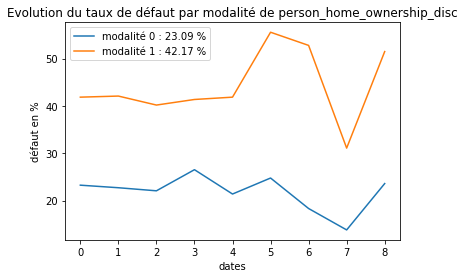

<Figure size 1440x1440 with 0 Axes>

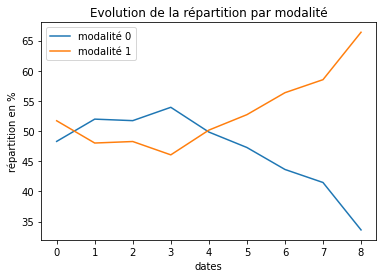

In [21]:
stabilty_def(df,"person_home_ownership_disc", "cb_person_cred_hist_length","id_contrat","loan_status",3)
stabilty_repartition(df,"person_home_ownership_disc", "cb_person_cred_hist_length","id_contrat",3)

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

,nombre,defaut,taux defaut,minimum,maximum
0,5719,1559,27.26,0.0,0.0
1,5719,1559,27.26,0.0,0.0
2,5719,1559,27.26,0.0,0.0
3,12172,3483,28.61,0.0,1.0
4,6453,1924,29.82,1.0,1.0
5,6453,1924,29.82,1.0,1.0
6,6453,1924,29.82,1.0,1.0
7,11974,3684,30.77,1.0,2.0
8,5521,1760,31.88,2.0,2.0
9,5521,1760,31.88,2.0,2.0


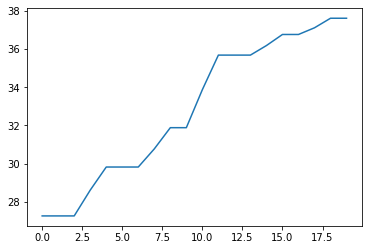

In [22]:
# loan_intent
find_bin(df,"loan_intent","loan_status")

In [23]:
data[["loan_intent","loan_status"]].groupby(by=["loan_intent"]).mean()
# Pas de justif métier au regroupement

,loan_status
loan_intent,
DEBTCONSOLIDATION,0.367613
EDUCATION,0.298156
HOMEIMPROVEMENT,0.376144
MEDICAL,0.356778
PERSONAL,0.318783
VENTURE,0.272600


In [15]:
#df["loan_intent_disc"] = np.where(df["loan_intent"] <= 2,0,1)

cond = [(df["loan_intent"] == 0) | (df["loan_intent"] == 1) | (df["loan_intent"] == 2)]
choix = [0]
df["loan_intent_disc"] = np.select(cond,choix,1)

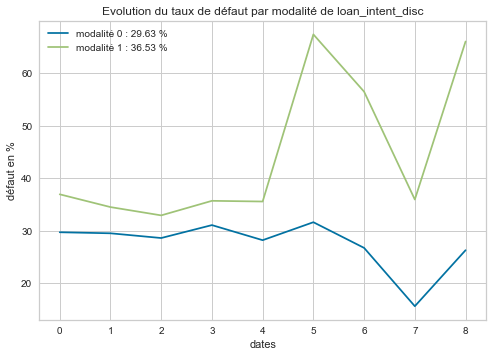

<Figure size 1440x1440 with 0 Axes>

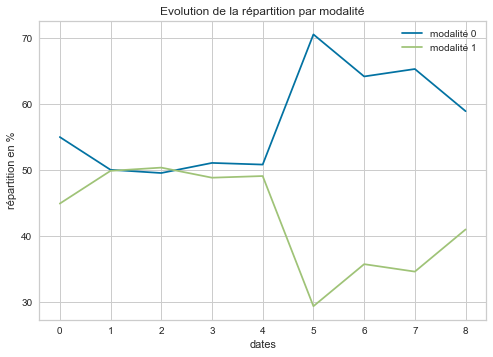

In [16]:
stabilty_def(df,"loan_intent_disc", "cb_person_cred_hist_length","id_contrat","loan_status",3)
stabilty_repartition(df,"loan_intent_disc", "cb_person_cred_hist_length","id_contrat",3)

# Discrétisation des quanti :

In [27]:
df_quant = df.drop(columns = var_disc)
df_quant

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,Downturn,id_contrat,person_home_ownership_disc,loan_intent_disc
0,22,59000,123.0,35000,16.02,1,0.59,3,1,0,1,0
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,2,0,1
3,23,65500,4.0,35000,15.23,1,0.53,2,1,3,1,1
4,24,54400,8.0,35000,14.27,1,0.55,4,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,0,32576,0,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,0,32577,0,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,32578,1,1
32579,56,150000,5.0,15000,11.48,0,0.10,26,0,32579,0,0


Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

,nombre,defaut,taux defaut,minimum,maximum
0,4877,1756,36.01,20.0,22.0
1,3633,1273,35.04,22.0,22.0
2,7522,2520,33.50,22.0,23.0
3,3889,1247,32.06,23.0,23.0
4,3889,1247,32.06,23.0,23.0
5,7438,2396,32.21,23.0,24.0
6,3549,1149,32.38,24.0,24.0
7,6586,2157,32.75,24.0,25.0
8,3037,1008,33.19,25.0,25.0
9,5514,1794,32.54,25.0,26.0


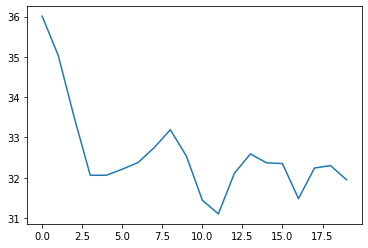

In [28]:
# person_age

find_bin(df,"person_age","loan_status")

In [18]:
cond  = [df["person_age"] < 23,(df["person_age"] >= 23)]
choix = [1,0]
df["person_age_disc"] = np.select(cond,choix)

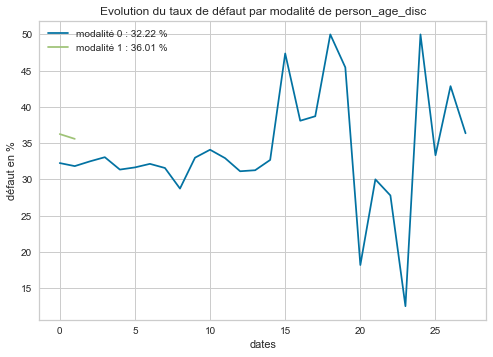

<Figure size 1440x1440 with 0 Axes>

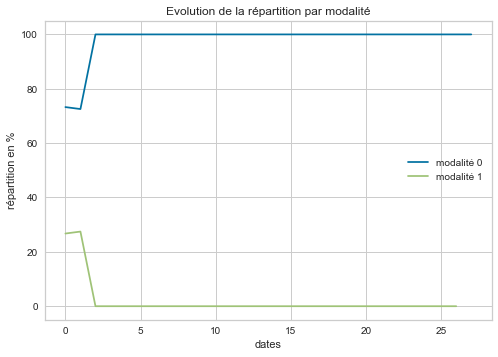

In [19]:
stabilty_def(df,"person_age_disc", "cb_person_cred_hist_length","id_contrat","loan_status",1)
stabilty_repartition(df,"person_age_disc", "cb_person_cred_hist_length","id_contrat",1)

# les données sont comme ca, les plus jeunes qui font défaut le font que sur des durées courtes 

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

,nombre,defaut,taux defaut,minimum,maximum
0,1630,1140,69.94,4000.0,22880.0
1,1633,685,41.95,22880.0,28590.0
2,1641,832,50.70,28590.0,31500.0
3,1752,802,45.78,31500.0,35000.0
4,1931,626,32.42,35000.0,38500.0
5,2029,631,31.10,38500.0,42000.0
6,1960,673,34.34,42000.0,45000.0
7,2168,679,31.32,45000.0,49000.0
8,1870,529,28.29,49000.0,52000.0
9,1785,573,32.10,52000.0,55000.0


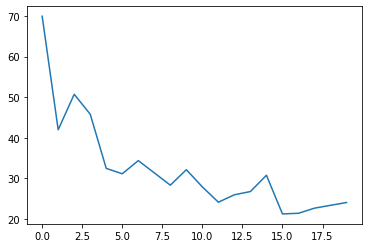

In [35]:
# person_income :
find_bin(df,"person_income","loan_status")

In [20]:
cond  = [df["person_income"] < 35000,(df["person_income"] >= 35000) & ( df["person_income"] < 79000),\
             (df["person_income"] >= 79000)]
choix = [2,1,0]
df["person_income_disc"] = np.select(cond,choix) # On arrondi toujours les valeurs pour plus de clareté dans le score

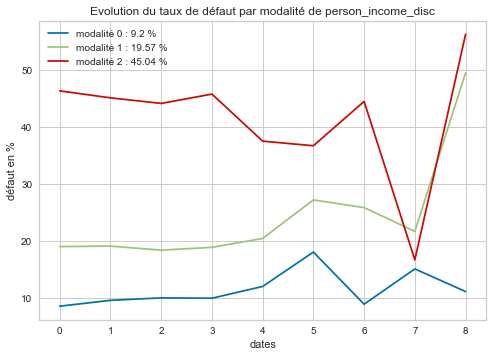

<Figure size 1440x1440 with 0 Axes>

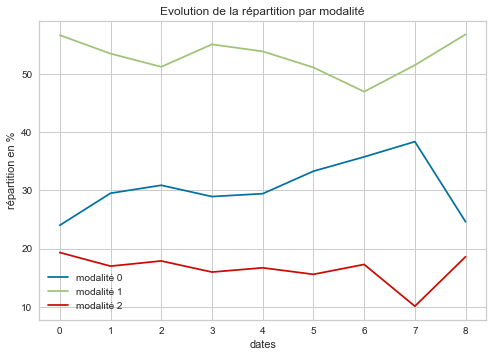

In [17]:
stabilty_def(df,"person_income_disc", "cb_person_cred_hist_length","id_contrat","loan_status",3)
stabilty_repartition(df,"person_income_disc","cb_person_cred_hist_length","id_contrat",3)

# Les croisements sont toujours là ont peux supposer qu'on a une influence liée à la conjoncture

In [40]:
df_quant.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'Downturn', 'id_contrat',
       'person_home_ownership_disc', 'loan_intent_disc'],
      dtype='object')

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

,nombre,defaut,taux defaut,minimum,maximum
0,4105,1573,38.32,0.0,0.0
1,4105,1573,38.32,0.0,0.0
2,7020,2688,38.29,0.0,1.0
3,2915,1115,38.25,1.0,1.0
4,6764,2462,36.40,1.0,2.0
5,3849,1347,35.00,2.0,2.0
6,7305,2507,34.32,2.0,3.0
7,3456,1160,33.56,3.0,3.0
8,3456,1160,33.56,3.0,3.0
9,6330,2128,33.62,3.0,4.0


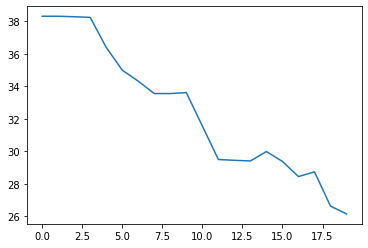

In [41]:
# person_emp_length :

find_bin(df,"person_emp_length","loan_status")

In [29]:
df[df["person_emp_length"].isnull() == True]['loan_status'].value_counts(normalize=True)

0    0.684916
1    0.315084
Name: loan_status, dtype: float64

In [21]:
var = "person_emp_length"

condition  = [df[var] < 2,(df[var] >= 2)]
choix = [1,0]
df[var + "_disc"] = np.select(condition,choix,1) # ne pas oublier les np.nan qui sont surement des personnes sans exp à mettre dans les deux donc

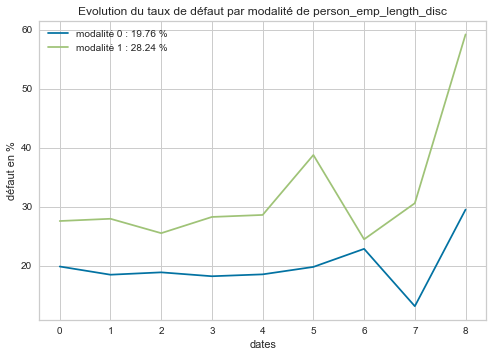

<Figure size 1440x1440 with 0 Axes>

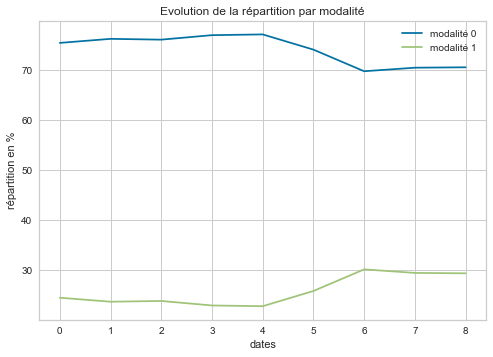

In [19]:
stabilty_def(df,"person_emp_length_disc", "cb_person_cred_hist_length","id_contrat","loan_status",3)
stabilty_repartition(df,"person_emp_length_disc", "cb_person_cred_hist_length","id_contrat",3)

# Croisement conjoncturel

In [46]:
df[["person_emp_length_disc","loan_status"]].groupby(by=["person_emp_length_disc"]).mean()

,loan_status
person_emp_length_disc,
0,0.310225
1,0.382691


Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

,nombre,defaut,taux defaut,minimum,maximum
0,1807,108,5.98,5.420,6.030
1,1834,170,9.27,6.030,6.910
2,1172,100,8.53,6.910,7.290
3,1917,205,10.69,7.290,7.510
4,2497,289,11.57,7.510,7.900
5,2006,278,13.86,7.900,8.900
6,1545,195,12.62,8.900,9.630
7,1989,327,16.44,9.630,10.250
8,1484,257,17.32,10.250,10.620
9,1876,321,17.11,10.620,10.990


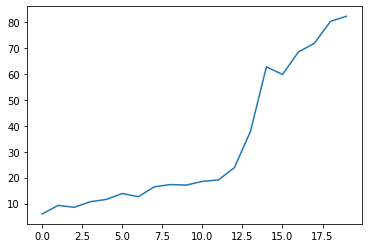

In [47]:
# loan_int_rate :

find_bin(df,"loan_int_rate","loan_status")

In [22]:
var = "loan_int_rate"

condition  = [df[var] < 9.6]
choix = [0]
df[var + "_disc"] = np.select(condition,choix,1) 

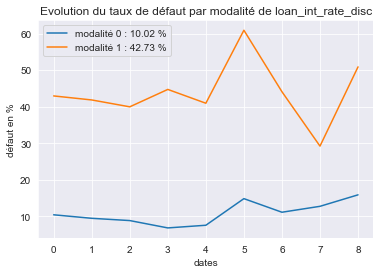

<Figure size 1440x1440 with 0 Axes>

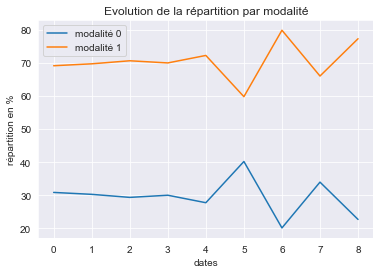

In [378]:
stabilty_def(df,"loan_int_rate_disc", "cb_person_cred_hist_length","id_contrat","loan_status",3)
stabilty_repartition(df,"loan_int_rate_disc", "cb_person_cred_hist_length","id_contrat",3)

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

,nombre,defaut,taux defaut,minimum,maximum
0,2274,525,23.09,0.00,0.04
1,2154,512,23.77,0.04,0.05
2,3861,879,22.77,0.05,0.07
3,2831,692,24.44,0.07,0.08
4,2816,697,24.75,0.08,0.09
5,2912,727,24.97,0.09,0.10
6,2914,737,25.29,0.10,0.11
7,2674,646,24.16,0.11,0.12
8,4069,991,24.35,0.12,0.14
9,2550,646,25.33,0.14,0.15


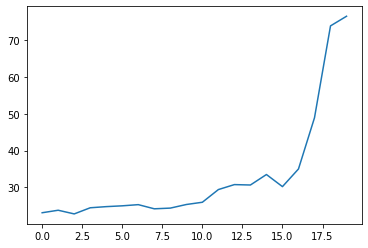

In [60]:
# loan_percent_income :
find_bin(df,"loan_percent_income","loan_status")

In [23]:
var = "loan_percent_income"

condition  = [df[var] < 0.16,(df[var] >= 0.16) & (df[var] < 0.28),df[var]>= 0.28]
choix = [0,1,2]
df[var + "_disc"] = np.select(condition,choix)

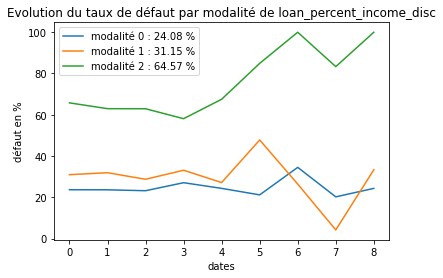

<Figure size 1440x1440 with 0 Axes>

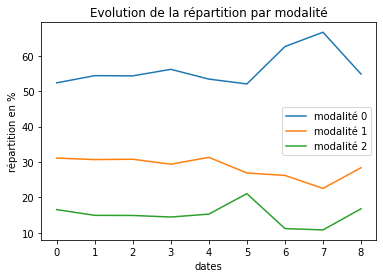

In [68]:
stabilty_def(df,"loan_percent_income_disc", "cb_person_cred_hist_length","id_contrat","loan_status",3)
stabilty_repartition(df,"loan_percent_income_disc", "cb_person_cred_hist_length","id_contrat",3)

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

,nombre,defaut,taux defaut,minimum,maximum
0,5965,2019,33.85,2.0,2.0
1,5965,2019,33.85,2.0,2.0
2,5965,2019,33.85,2.0,2.0
3,11908,3999,33.58,2.0,3.0
4,5943,1980,33.32,3.0,3.0
5,5943,1980,33.32,3.0,3.0
6,5943,1980,33.32,3.0,3.0
7,11868,3927,33.09,3.0,4.0
8,5925,1947,32.86,4.0,4.0
9,5925,1947,32.86,4.0,4.0


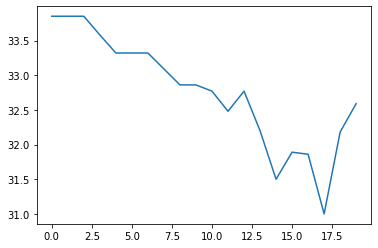

In [69]:
# cb_person_cred_hist_length : 
find_bin(df,"cb_person_cred_hist_length","loan_status") # déjà utilisée comme date

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

,nombre,defaut,taux defaut,minimum,maximum
0,1786,585,32.75,500.0,2000.0
1,2746,920,33.50,2000.0,3000.0
2,2026,628,31.00,3000.0,3600.0
3,1847,555,30.05,3600.0,4400.0
4,3006,901,29.97,4400.0,5000.0
5,2335,687,29.42,5000.0,5400.0
6,2493,644,25.83,5400.0,6000.0
7,2641,679,25.71,6000.0,6750.0
8,2094,590,28.18,6750.0,7500.0
9,2209,674,30.51,7500.0,8000.0


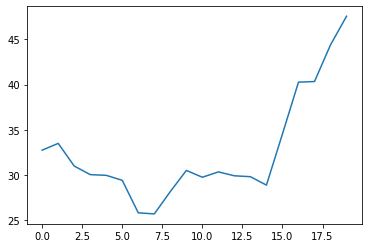

In [70]:
# loan_amnt :

find_bin(df,"loan_amnt","loan_status")

In [24]:
var = "loan_amnt"

condition  = [df[var] < 15000,df[var]>= 15000]
choix = [0,1]
df[var + "_disc"] = np.select(condition,choix)

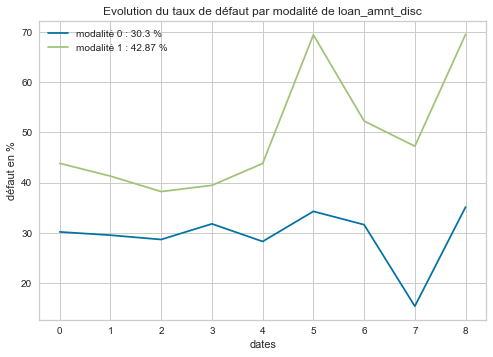

<Figure size 1440x1440 with 0 Axes>

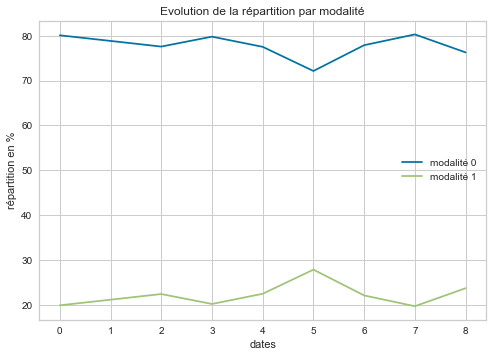

In [25]:
stabilty_def(df,"loan_amnt_disc", "cb_person_cred_hist_length","id_contrat","loan_status",3)
stabilty_repartition(df,"loan_amnt_disc", "cb_person_cred_hist_length","id_contrat",3)

In [25]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'Downturn', 'id_contrat',
       'loan_intent_disc', 'person_age_disc', 'person_income_disc',
       'person_emp_length_disc', 'loan_int_rate_disc',
       'loan_percent_income_disc', 'loan_amnt_disc'],
      dtype='object')

In [26]:
df2 = df[["Downturn","person_home_ownership_disc","loan_intent_disc","person_age_disc","person_income_disc","person_emp_length_disc",'loan_int_rate_disc',\
            'loan_percent_income_disc', 'loan_amnt_disc',"loan_grade","loan_status"]]

In [27]:
df2.columns = df2.columns.str.rstrip('_disc')
df2

,Downturn,person_home_ownership,loan_intent,person_age,person_income,person_emp_length,loan_int_rate,loan_percent_income,loan_amnt,loan_grade,loan_statu
0,1,1,0,1,1,0,1,2,1,1,1
1,0,0,0,1,2,0,1,0,0,0,0
2,0,0,1,0,2,1,1,2,0,1,1
3,1,1,1,0,1,0,1,2,1,1,1
4,1,1,1,0,1,0,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
32576,0,0,0,0,1,1,1,0,0,1,0
32577,0,0,0,0,0,0,0,0,1,0,0
32578,0,1,1,0,1,0,1,2,1,0,1
32579,0,0,0,0,0,0,1,0,1,0,0


In [28]:
df2.drop(columns = ["loan_amnt","loan_int_rate"],inplace=True) 

# On la drop car multicolinéarité avec la variable person_income et loan_percent_income ;
# loan_int_rate : on préfère Downtunr d'un point de vue métier


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
df_khi_deux_tar = khi_deux(df2,"loan_statu",0.05)
df_khi_deux_tar

,loan_statu,loan_grade,Downturn,loan_percent_income,person_income,person_home_ownership,loan_intent,person_emp_length,person_age
stat,32576.462071,10875.115652,6339.560586,2999.209757,1688.390595,1.343981e+03,1.740072e+02,1.424727e+02,2.686303e+01
p-value,0.000000,0.000000,0.000000,0.000000,0.000000,3.130345e-294,9.863287e-40,7.665042e-33,2.183966e-07


In [30]:
l,col = step_by_step_log(df2,"loan_statu")

importance de la dépendance par rapport à la variable du défaut, loan_statu : 
Optimization terminated successfully.
         Current function value: 0.468801
         Iterations 6
importance de la dépendance par rapport à la variable du défaut, loan_statu : 
Optimization terminated successfully.
         Current function value: 0.466833
         Iterations 6
importance de la dépendance par rapport à la variable du défaut, loan_statu : 
Optimization terminated successfully.
         Current function value: 0.428414
         Iterations 6
importance de la dépendance par rapport à la variable du défaut, loan_statu : 
Optimization terminated successfully.
         Current function value: 0.416064
         Iterations 6
importance de la dépendance par rapport à la variable du défaut, loan_statu : 
Optimization terminated successfully.
         Current function value: 0.408262
         Iterations 7
importance de la dépendance par rapport à la variable du défaut, loan_statu : 
Optimization ter

In [31]:
l

['loan_statu ~ loan_grade + Downturn + loan_percent_income + person_income + person_home_ownership + loan_intent + person_emp_length']

In [32]:
col

['loan_grade',
 'Downturn',
 'loan_percent_income',
 'person_income',
 'person_home_ownership',
 'loan_intent',
 'person_emp_length',
 'loan_statu']

# Modèle final :

In [33]:
df3 = df2[col]

In [34]:
log_reg = smf.logit(l[0], data=df2).fit()
log_reg.bic

Optimization terminated successfully.
         Current function value: 0.405108
         Iterations 7


26480.8104894626

In [35]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             loan_statu   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32573
Method:                           MLE   Df Model:                            7
Date:                Mon, 06 Jun 2022   Pseudo R-squ.:                  0.3596
Time:                        13:43:20   Log-Likelihood:                -13199.
converged:                       True   LL-Null:                       -20612.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.7180      0.045    -82.020      0.000      -3.807      -3.629
loan_grade                2.4502      0.038     63.829      0.000       2.375       2.525
Downturn                  0.5083      0.046     11.154      0.000       0.419       0.598
loan_percent_income       0.8358      0.022     38.468      0.000       0.793       0.878
person_income             0.5530      0.026     21.410      0.000       0.502       0.604
person_home_ownership     0.6984      0.032     21.574      0.000       0.635       0.762
loan_intent               0.4295      0.031     13.790      0.000       0.368       0.490
person_emp_length         0.1362      0.036      3.807      0.000       0.066       0.206
=========================================================================================
"""

In [36]:
X = df3.drop(columns = "loan_statu")
y = df3["loan_statu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
lr = LogisticRegression(random_state = 123)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred)

array([[5817,  737],
       [1132, 2089]], dtype=int64)

In [39]:
f1_score(y_test, y_pred)

0.6909211179097072

In [40]:
roc_auc_score(y_test,y_pred)

0.7680529684988949

In [41]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.7517846678924422


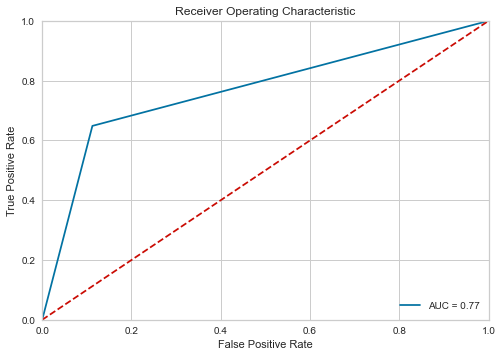

In [42]:
fpr, tpr, threshold1 = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Grille de Score

In [43]:
var_keep = df3.drop(columns = "loan_statu").columns

In [44]:
dt = scorecard(df3,var_keep,"loan_statu")
dt

,Note
loan_grade_0,417.085260
loan_grade_1,82.778544
loan_grade_2,0.000000
Downturn_0,55.502001
Downturn_1,0.000000
loan_percent_income_0,244.074402
loan_percent_income_1,234.121345
loan_percent_income_2,0.000000
person_income_0,129.109571
person_income_1,109.116353


In [45]:
dt = resume_score(df3,var_keep,"loan_statu")
dt

,Note,Value,taux de défaut,correspondance,répartition,correspondance repartition
loan_grade_0,417.085260,0,0.130676,0,0.651545,0
loan_grade_1,82.778544,1,0.678699,1,0.309506,1
loan_grade_2,0.000000,2,0.837667,2,0.038949,2
Downturn_0,55.502001,0,0.225452,0,0.803628,0
Downturn_1,0.000000,1,0.746796,1,0.196372,1
loan_percent_income_0,244.074402,0,0.240838,0,0.527608,0
loan_percent_income_1,234.121345,1,0.311492,1,0.311961,1
loan_percent_income_2,0.000000,2,0.645686,2,0.160431,2
person_income_0,129.109571,0,0.223588,0,0.252172,0
person_income_1,109.116353,1,0.303351,1,0.556889,1


In [46]:
dt["Value"] == dt["correspondance"]

loan_grade_0               True
loan_grade_1               True
loan_grade_2               True
Downturn_0                 True
Downturn_1                 True
loan_percent_income_0      True
loan_percent_income_1      True
loan_percent_income_2      True
person_income_0            True
person_income_1            True
person_income_2            True
person_home_ownership_0    True
person_home_ownership_1    True
loan_intent_0              True
loan_intent_1              True
person_emp_length_0        True
person_emp_length_1        True
dtype: bool

In [47]:
dt

,Note,Value,taux de défaut,correspondance,répartition,correspondance repartition
loan_grade_0,417.085260,0,0.130676,0,0.651545,0
loan_grade_1,82.778544,1,0.678699,1,0.309506,1
loan_grade_2,0.000000,2,0.837667,2,0.038949,2
Downturn_0,55.502001,0,0.225452,0,0.803628,0
Downturn_1,0.000000,1,0.746796,1,0.196372,1
loan_percent_income_0,244.074402,0,0.240838,0,0.527608,0
loan_percent_income_1,234.121345,1,0.311492,1,0.311961,1
loan_percent_income_2,0.000000,2,0.645686,2,0.160431,2
person_income_0,129.109571,0,0.223588,0,0.252172,0
person_income_1,109.116353,1,0.303351,1,0.556889,1


### Note :

In [48]:
df3 = df2[col]
df3

,loan_grade,Downturn,loan_percent_income,person_income,person_home_ownership,loan_intent,person_emp_length,loan_statu
0,1,1,2,1,1,0,0,1
1,0,0,0,2,0,0,0,0
2,1,0,2,2,0,1,1,1
3,1,1,2,1,1,1,0,1
4,1,1,2,1,1,1,0,1
...,...,...,...,...,...,...,...,...
32576,1,0,0,1,0,0,1,0
32577,0,0,0,0,0,0,0,0
32578,0,0,2,1,1,1,0,1
32579,0,0,0,0,0,0,0,0


In [55]:
df3 = att_note(df3,var_keep,"loan_statu")

In [56]:
df3

,loan_grade,Downturn,loan_percent_income,person_income,person_home_ownership,loan_intent,person_emp_length,loan_statu,note_final
0,1,1,2,1,1,0,0,1,259.213879
1,0,0,0,2,0,0,0,0,870.890429
2,1,0,2,2,0,1,1,1,225.190328
3,1,1,2,1,1,1,0,1,206.295602
4,1,1,2,1,1,1,0,1,206.295602
...,...,...,...,...,...,...,...,...,...
32576,1,0,0,1,0,0,1,0,631.299360
32577,0,0,0,0,0,0,0,0,1000.000000
32578,0,0,2,1,1,1,0,1,596.104319
32579,0,0,0,0,0,0,0,0,1000.000000


## Densité conditionelle :

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


Text(0, 0.5, 'Density')

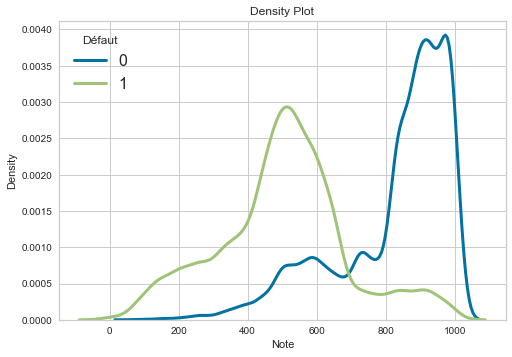

In [57]:
values = [0,1]

for val in values:
    subset = df3[df3['loan_statu'] == val]
    sns.distplot(subset['note_final'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = val)
    
plt.legend(prop={'size': 16}, title = 'Défaut')
plt.title('Density Plot')
plt.xlabel('Note')
plt.ylabel('Density')

In [58]:
X = df3["note_final"]

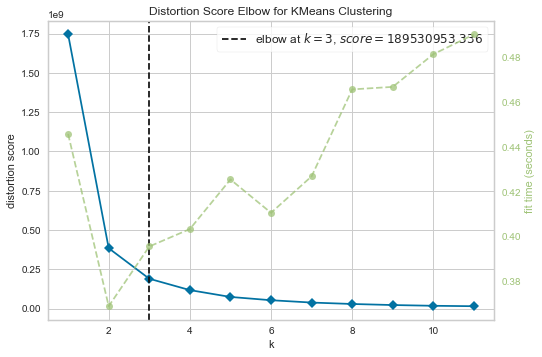

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X.values.reshape(-1,1))
visualizer.show()

In [60]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X.values.reshape(-1,1))

In [61]:
df3["kmeans_label"] = list(kmeans.labels_)

In [62]:
df3[["kmeans_label","note_final"]].groupby(by=["kmeans_label"]).min()

,note_final
kmeans_label,
0,444.548186
1,755.925598
2,0.000000


In [63]:
df3[["kmeans_label","note_final"]].groupby(by=["kmeans_label"]).max()

,note_final
kmeans_label,
0,741.524893
1,1000.000000
2,443.086679


In [64]:
# Soit les CHR comme suit :

cond = [(df3["note_final"] < 443), (df3["note_final"] >= 443) & (df3["note_final"] < 741), (df3["note_final"] >= 741)]
choix = [2,1,0]

df3["note_final_km"] = np.select(cond,choix)

In [65]:
df3.drop(columns = "kmeans_label",inplace = True)

In [66]:
df3

,loan_grade,Downturn,loan_percent_income,person_income,person_home_ownership,loan_intent,person_emp_length,loan_statu,note_final,note_final_km
0,1,1,2,1,1,0,0,1,259.213879,2
1,0,0,0,2,0,0,0,0,870.890429,0
2,1,0,2,2,0,1,1,1,225.190328,2
3,1,1,2,1,1,1,0,1,206.295602,2
4,1,1,2,1,1,1,0,1,206.295602,2
...,...,...,...,...,...,...,...,...,...,...
32576,1,0,0,1,0,0,1,0,631.299360,1
32577,0,0,0,0,0,0,0,0,1000.000000,0
32578,0,0,2,1,1,1,0,1,596.104319,1
32579,0,0,0,0,0,0,0,0,1000.000000,0


In [68]:
df3[["note_final_km","loan_statu"]].groupby(by=["note_final_km"]).mean()

,loan_statu
note_final_km,
0,0.057293
1,0.563131
2,0.828626


In [70]:
df3["note_final_km"].value_counts(normalize=True)

0    0.533041
1    0.337651
2    0.129308
Name: note_final_km, dtype: float64

In [ ]:
# CHR avec notre méthode de vingtile :

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame

,nombre,defaut,taux defaut,minimum,maximum
0,1700,1556,91.53,0.000000,293.205385
1,1687,1319,78.19,293.205385,401.625663
2,1732,1294,74.71,401.625663,470.363222
3,1827,1268,69.40,470.363222,503.288281
4,1872,1222,65.28,503.288281,537.279787
5,1740,1084,62.30,537.279787,575.797359
6,1879,1142,60.78,575.797359,610.191283
7,1772,990,55.87,610.191283,649.022596
8,2063,751,36.40,649.022596,731.062368
9,1756,291,16.57,731.062368,808.019095


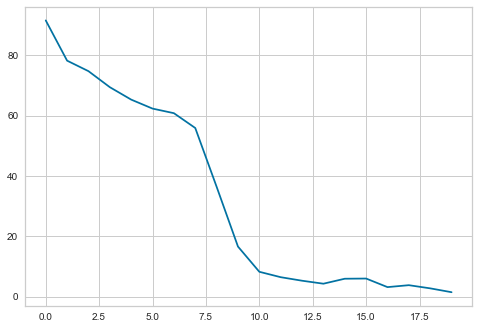

In [71]:
find_bin(df3,"note_final","loan_statu")

In [72]:
var = "note_final"
cond  = [df3[var] < 401,(df3[var] >= 401) & (df3[var] < 610), (df3[var] >= 610) & ((df3[var] < 808)) ]
choix = [3,2,1]
df3[var + "_disc"] = np.select(cond,choix,0)

In [73]:
df3[["note_final_disc","loan_statu"]].groupby("note_final_disc").mean()

,loan_statu
note_final_disc,
0,0.048931
1,0.345290
2,0.665891
3,0.855820


In [ ]:
# CAH :

In [74]:
cah = AgglomerativeClustering(n_clusters = 3).fit_predict(X.values.reshape(-1,1))

In [75]:
df3["cah_label"] = list(cah)

In [76]:
df3[["cah_label","note_final"]].groupby(by=["cah_label"]).min()

,note_final
cah_label,
0,703.007321
1,311.393384
2,0.000000


In [77]:
df3[["cah_label","note_final"]].groupby(by=["cah_label"]).max()

,note_final
cah_label,
0,1000.000000
1,683.014102
2,304.024051


In [78]:
# Soit les CHR comme suit :

cond = [(df3["note_final"] < 304), (df3["note_final"] >= 304) & (df3["note_final"] < 683), (df3["note_final"] >= 683)]
choix = [2,1,0]

df3["note_final_cah"] = np.select(cond,choix)

In [79]:
df3

,loan_grade,Downturn,loan_percent_income,person_income,person_home_ownership,loan_intent,person_emp_length,loan_statu,note_final,note_final_km,note_final_disc,cah_label,note_final_cah
0,1,1,2,1,1,0,0,1,259.213879,2,3,2,2
1,0,0,0,2,0,0,0,0,870.890429,0,0,0,0
2,1,0,2,2,0,1,1,1,225.190328,2,3,2,2
3,1,1,2,1,1,1,0,1,206.295602,2,3,2,2
4,1,1,2,1,1,1,0,1,206.295602,2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1,0,0,1,0,0,1,0,631.299360,1,1,1,1
32577,0,0,0,0,0,0,0,0,1000.000000,0,0,0,0
32578,0,0,2,1,1,1,0,1,596.104319,1,2,1,1
32579,0,0,0,0,0,0,0,0,1000.000000,0,0,0,0


In [83]:
# Kmeans :

X = df3["note_final_km"].values.reshape(-1,1)
y = df3["loan_statu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state = 123)
lr.fit(X_train, y_train)
y_pred_km = lr.predict(X_test)
roc_auc_score(y_test,y_pred_km)

0.6453620754551991

In [81]:
# CAH :
    
X = df3["note_final_cah"].values.reshape(-1,1)
y = df3["loan_statu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state = 123)
lr.fit(X_train, y_train)
y_pred_cah = lr.predict(X_test)
roc_auc_score(y_test,y_pred_cah)

0.84549791823323

In [82]:
# Vingtile :

X = df3["note_final_disc"].values.reshape(-1,1)
y = df3["loan_statu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(random_state = 123)
lr.fit(X_train, y_train)
y_pred_disc = lr.predict(X_test)
roc_auc_score(y_test,y_pred_disc)

0.8145930822644384

# Challenger :

## Random Forest :

In [85]:
col_ = col

col_[-1] = "loan_status" # fixer ce pb suite au fait de garder que les _disc
try :
    col_.remove("loan_int_rate")
except :
    pass
col_.append("loan_int_rate_disc")

df_ml = df[col_]
#df_ml['person_emp_length'] = df_ml['person_emp_length'].replace(np.nan, 0)

X = df_ml.drop(columns = "loan_status")
y = df_ml["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6554
           1       0.76      0.76      0.76      3221

    accuracy                           0.84      9775
   macro avg       0.82      0.82      0.82      9775
weighted avg       0.84      0.84      0.84      9775

0.7597503900156005
0.8204660785278028
0.7999739286111391


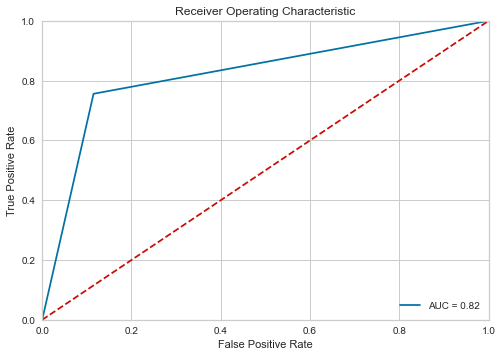

In [105]:
fpr, tpr, threshold1 = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

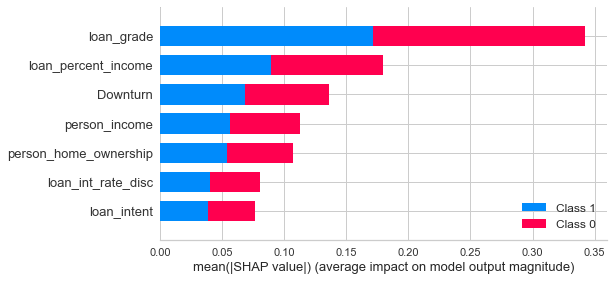

None


In [88]:
# Importance feature plot :

rf.fit(X_train, y_train)
shap_values = shap.TreeExplainer(rf).shap_values(X_test)

print(shap.summary_plot(shap_values, X_test, plot_type="bar"))

In [89]:
explainer = shap.Explainer(rf.predict, X_test)
shap_values = explainer(X_test)

Exact explainer: 9776it [26:31,  6.12it/s]                          


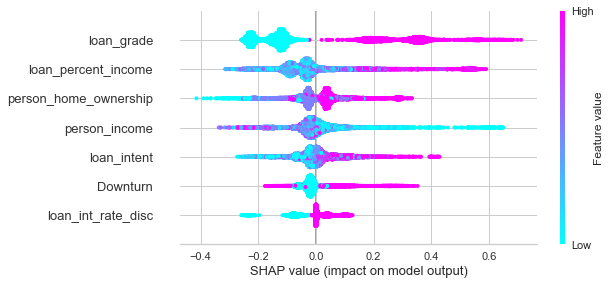

In [91]:
shap.plots.beeswarm(shap_values, color=plt.get_cmap("cool"))

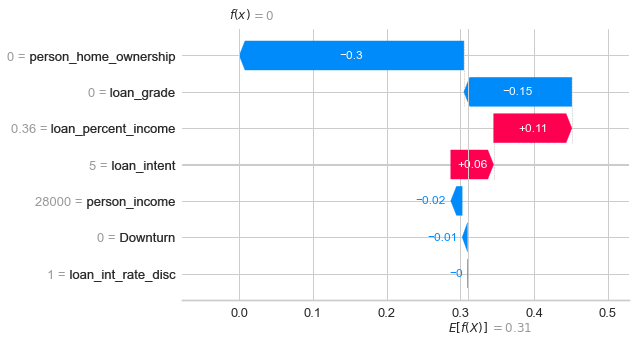

In [92]:
shap.plots.waterfall(shap_values[0])

In [93]:
proba = rf.predict_proba(X_test)[:,1]

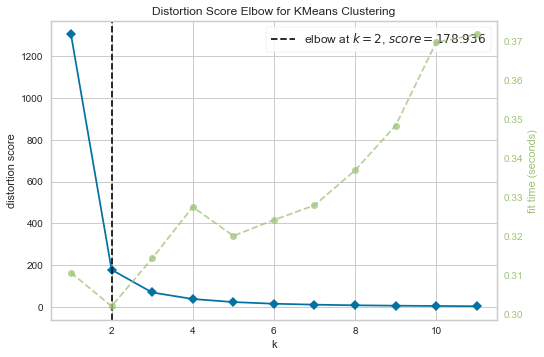

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [831]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(proba.reshape(-1,1))
visualizer.show()

In [95]:
cah_rf = AgglomerativeClustering(n_clusters = 4).fit_predict(proba.reshape(-1,1))

In [97]:
cah_rf

array([1, 3, 1, ..., 0, 1, 0], dtype=int64)

In [98]:
data_proba = pd.DataFrame({'Proba':list(proba), 'cluster':list(cah_rf)})

In [99]:
data_proba[["cluster","Proba"]].groupby(by=["cluster"]).min()

,Proba
cluster,
0,0.713333
1,0.000000
2,0.179167
3,0.512500


In [100]:
data_proba[["cluster","Proba"]].groupby(by=["cluster"]).max()

,Proba
cluster,
0,1.0000
1,0.1750
2,0.5100
3,0.7115


Profil de risque selon la probabilité de tombé en défaut :

- [ 0 ; 0.18 [ : risque faible 
- [ 0.18 ; 0.51 [ : risque modéré
- [ 0.51 ; 0.72 [ : risque élevé
- [0.72 ; 1 ] : risque très elevé

On peut appliquer ainsi une notation allant de 1 à 4 correspondant au profil de risque.

L'idée maintenant est que pour chaque nouveau client avec de nouvelles caractéristiques on applique la note selon la proba de faire défaut (avec les RF) puis on sort le waterfall plot afin d'avoir des explications de ce qu'à fait l'algo avec streamlit. Donc c'est faire une interface qui nous permet de renseigner les nouvelles caractéristiques du client et nous sortent une décision compléte reprenant tout le projet, score + rf. 

In [ ]:
## test avec un nouveau client :

In [101]:
new_client = pd.DataFrame({"loan_grade":[1],"Downturn":[0],"loan_percent_income":[0.3],"person_income" : 35000,"person_home_ownership":[1],"loan_intent":[3],"person_emp_length":[0]})
new_client

,loan_grade,Downturn,loan_percent_income,person_income,person_home_ownership,loan_intent,person_emp_length
0,1,0,0.3,35000,1,3,0


In [102]:
explainer_new = shap.Explainer(rf.predict, new_client)
shap_values_new = explainer(new_client)

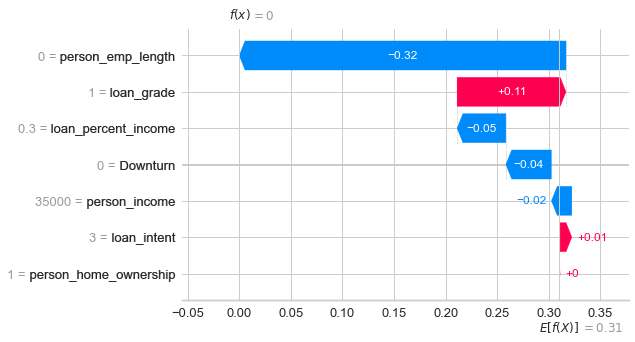

In [103]:
shap.plots.waterfall(shap_values_new[0])

In [104]:
rf.predict_proba(new_client)[:,1]

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- person_emp_length
Feature names seen at fit time, yet now missing:
- loan_int_rate_disc



array([0.27])

## Gradient Boosting :

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      6554
           1       0.74      0.87      0.80      3221

    accuracy                           0.86      9775
   macro avg       0.84      0.86      0.85      9775
weighted avg       0.87      0.86      0.86      9775

0.8036529680365296
0.8630544260719606


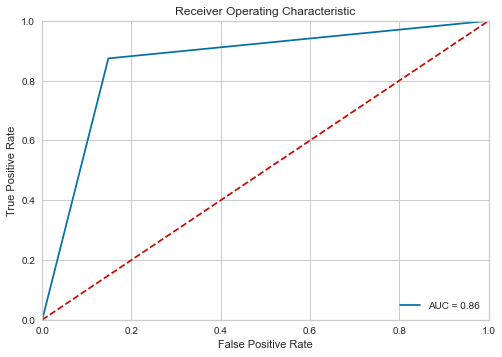

In [113]:
fpr, tpr, threshold1 = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

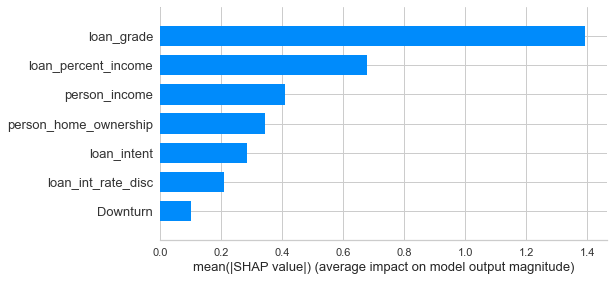

None


In [114]:
# Importance feature plot :

clf.fit(X_train, y_train)
shap_values = shap.TreeExplainer(clf).shap_values(X_test)

print(shap.summary_plot(shap_values, X_test, plot_type="bar"))

In [115]:
explainer = shap.Explainer(clf.predict, X_test)
shap_values = explainer(X_test)

Exact explainer: 9776it [02:08, 67.88it/s]                           


In [116]:
proba = clf.predict_proba(X_test)[:,1]

In [117]:
cah_gb = AgglomerativeClustering(n_clusters = 4).fit_predict(proba.reshape(-1,1))

In [118]:
cah_gb

array([0, 2, 2, ..., 3, 0, 1], dtype=int64)

In [119]:
data_proba_gb = pd.DataFrame({'Proba':list(proba), 'cluster':list(cah_gb)})

In [120]:
data_proba_gb[["cluster","Proba"]].groupby(by=["cluster"]).min()

,Proba
cluster,
0,0.005259
1,0.695520
2,0.330776
3,0.900618


In [122]:
data_proba_gb[["cluster","Proba"]].groupby(by=["cluster"]).max()

,Proba
cluster,
0,0.322774
1,0.897557
2,0.694331
3,0.999802


Profil de risque selon la probabilité de tombé en défaut :

- [ 0 ; 0.32 [ : risque faible 
- [ 0.32 ; 0.69 [ : risque modéré
- [ 0.69 ; 0.0.89 [ : risque élevé
- [0.89 ; 1 ] : risque très elevé

On peut appliquer ainsi une notation allant de 1 à 4 correspondant au profil de risque.

## Nouveau client :

In [125]:
explainer_new = shap.Explainer(clf.predict, new_client)
shap_values_new = explainer(new_client)

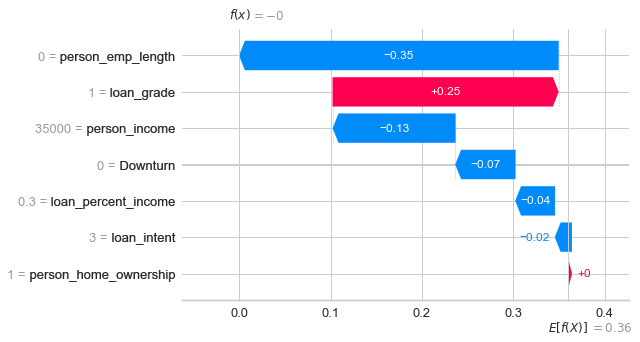

In [126]:
shap.plots.waterfall(shap_values_new[0])